# Ground state solvers

In [24]:
H2_driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

# Electronic structure problem
H2_problem = H2_driver.run()

In [28]:
H2_problem.num_particles

(1, 1)

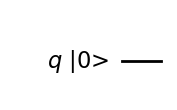

In [38]:
from qiskit_nature.second_q.mappers import JordanWignerMapper, ParityMapper, TaperedQubitMapper
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

# mapper = ParityMapper()
mapper = H2_problem.get_tapered_mapper(JordanWignerMapper())

initial_state=HartreeFock(
            H2_problem.num_spatial_orbitals,
            H2_problem.num_particles,
            mapper,
)
initial_state.draw('mpl',initial_state=True)

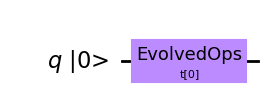

In [39]:
ansatz = UCCSD(
        H2_problem.num_spatial_orbitals,
        H2_problem.num_particles,
        mapper,
        initial_state=initial_state
    )
ansatz.draw('mpl',initial_state=True)

In [1]:
import os
import ipyparallel as ipp

cluster = ipp.Cluster(n=4)
with cluster as rc:
    ar = rc[:].apply_async(os.getpid)
    pid_map = ar.get_dict()

Starting 4 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


  0%|          | 0/4 [00:00<?, ?engine/s]

Stopping engine(s): 1685902833
engine set stopped 1685902833: {'engines': {'0': {'exit_code': 0, 'pid': 32365, 'identifier': '0'}, '1': {'exit_code': 0, 'pid': 32382, 'identifier': '1'}, '2': {'exit_code': 0, 'pid': 32384, 'identifier': '2'}, '3': {'exit_code': 0, 'pid': 32386, 'identifier': '3'}}, 'exit_code': 0}
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 32339, 'identifier': 'ipcontroller-1685902832-i0z3-4231'}


In [20]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

driver = PySCFDriver(atom=open('PSPCz.xyz').read(),
    charge=0,spin=0, basis='631g*', unit=DistanceUnit.ANGSTROM)
problem = driver.run_pyscf()

In [23]:
problem._calc.e.tot

AttributeError: 'NoneType' object has no attribute '_calc'

In [10]:
# driver.atom'PSPCz.xyz'
print(driver._atom)

  # PSPCz molecule;  ###############################;    C -0.316640    1.1348450    0.6956120;    C -0.8886300    0.3253780   -0.2344140;    C -0.1842470   -0.1935670   -1.3239330;    C  1.1662930    0.0801450   -1.4737160;    C  1.8089230    0.8832220   -0.5383540;    C  1.1155860    1.4218050    0.5392780;    S  3.5450920    1.2449890   -0.7349240;    O  3.8606900    1.0881590   -2.1541690;    C  4.3889120   -0.0620730    0.1436780;    O  3.8088290    2.4916780   -0.0174650;    C  4.6830900    0.1064460    1.4918230;    C  5.3364470   -0.9144080    2.1705280;    C  5.6895490   -2.0818670    1.5007820;    C  5.4000540   -2.2323130    0.1481350;    C  4.7467230   -1.2180160   -0.5404770;    N -2.2589180    0.0399120   -0.0793330;    C -2.8394600   -1.2343990   -0.1494160;    C -4.2635450   -1.0769890    0.0660760;    C -4.5212550    0.2638010    0.2662190;    C -3.2669630    0.9823890    0.1722720;    C -2.2678900   -2.4598950   -0.3287380;    C -3.1299420   -3.6058560   -0.3236210;  

In [13]:
from qiskit_nature.second_q.problems import (
    ElectronicBasis,
    ElectronicStructureProblem,
    ElectronicStructureResult,
)
from qiskit_nature.second_q.transformers import BasisTransformer
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer


# problem = driver.run()

In [17]:
test = driver.to_qcschema

MemoryError: Unable to allocate 255. GiB for an array with shape (1, 430, 430, 430, 430) and data type float64

In [ ]:
test.

In [14]:
print('Number of AO:', driver.nao_nr())
print('Shape of AO 1-Body terms:', PSPCz_mol.intor('int1e_kin').shape)

AttributeError: 'PySCFDriver' object has no attribute 'nao_nr'

In [5]:
from qiskit_nature.second_q.formats.qcschema import QCCenterData

driver_reduced = QCCenterData.from_hdf5('PSPCz_reduced.hdf5')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'PSPCz_reduced.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [2]:
problem = ElectronicStructureProblem(driver_reduced)

NameError: name 'ElectronicStructureProblem' is not defined

In [ ]:
basis_transformer = BasisTransformer(
    ElectronicBasis.AO,
    ElectronicBasis.MO,
    ElectronicIntegrals.from_raw_integrals(ao2mo_alpha, h1_b=ao2mo_beta),

In [ ]:
# ao_problem = driver.to_problem(basis=ElectronicBasis.AO)
# print(ao_problem.basis)

# ao_hamil = ao_problem.hamiltonian
# print(ao_hamil.electronic_integrals.alpha)

as_transformer = ActiveSpaceTransformer(2, 2, active_orbitals=[99, 100])
as_problem = as_transformer.transform(driver.to_problem(basis=ElectronicBasis.AO))
print(as_problem.num_particles)
print(as_problem.num_spatial_orbitals)
print(as_problem.hamiltonian.electronic_integrals.alpha)



In [32]:
from qiskit.algorithms.minimum_eigensolvers import (
    VQE, AdaptVQE, NumPyMinimumEigensolver)
from qiskit.algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np

mapper = JordanWignerMapper()

In [33]:
solver = GroundStateEigensolver(mapper, NumPyMinimumEigensolver())
result = solver.solve(es_problem)
print(result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275030202
  - computed part:      -1.857275030202
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137306035753
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.388948701555]
    - computed part:      [0.0  0.0  1.388948701555]
  > Dipole moment (a.u.): [0.0  0.0  -0.000000001555]  Total: 0.000000001555
                 (debye): [0.0  0.0  -0.000000003953]  Total: 0.000000003953
 


In [34]:

# mapper = QubitConverter(JordanWignerMapper())
mapper = JordanWignerMapper()

ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)

vqe_solver = VQE(Estimator(), ansatz, SLSQP())
vqe_solver.initial_point = np.zeros(ansatz.num_parameters)

adapt_vqe = AdaptVQE(vqe_solver)


In [35]:


vqe_calc = GroundStateEigensolver(mapper, vqe_solver)
vqe_res = vqe_calc.solve(es_problem)

adap_calc = GroundStateEigensolver(mapper, adapt_vqe)
adap_res = adap_calc.solve(es_problem)

print(f"VQE total ground state energy = {vqe_res.total_energies[0]:.4f}")
print(f"ADAPT-VQE total ground state energy = {adap_res.total_energies[0]:.4f}")

VQE total ground state energy = -1.1373
ADAPT-VQE total ground state energy = -1.1373


In [36]:
vqe_res.hartree_fock_energy

-1.116998996754004

In [37]:
es_problem.reference_energy

-1.116998996754004

In [38]:
import pandas as pd

dict = {'Name' : ['Martha', 'Tim', 'Rob', 'Georgia'],
        'Maths' : [87, 91, 97, 95],
        'Science' : [83, 99, 84, 76]}
df = pd.DataFrame(dict)
df

,Name,Maths,Science
0,Martha,87,83
1,Tim,91,99
2,Rob,97,84
3,Georgia,95,76


In [41]:
dict = {'Method' : ['Hartree-Fock', 'Exact', 'VQE'],
        'Ground state energy' : [es_problem.reference_energy, adap_res.total_energies[0], vqe_res.total_energies[0]],
        'Delta' : [83, 99, 8]}
df = pd.DataFrame(dict)
df

,Method,Ground state energy,Delta
0,Hartree-Fock,-1.116999,83
1,Exact,-1.137306,99
2,VQE,-1.137306,8


In [ ]:
from pyscf import gto, scf, mcscf
from pyscf.mcscf import avas #AVAS method to construct mcscf active space

from qiskit_nature_pyscf import QiskitSolver

In [ ]:
#  Initialisation de la structure moléculaire
H2_mol = gto.M(atom="H 0 0 0; H 0 0 .735", basis="sto-3g")

# Calculs HF 
H2_h_f = scf.RHF(H2_mol).run()

# Calculs post-HF
norb, nelec, mo =avas.avas(H2_h_f,['H 1s','H 1s'])

H2_cas = mcscf.CASCI(H2_h_f, norb, nelec)

# Intégration de l'algorithme quantique
# mapper = JordanWignerMapper()
# optimizer = SPSA()

H2_cas.fcisolver = QiskitSolver(adap_calc)

H2_cas.run()

converged SCF energy = -1.116998996754
CASCI E = -1.1373060356956  E(CI) = -1.85727503014458


In [ ]:
import qiskit.tools.jupyter

%qiskit_version_table